In [21]:
pip install colorama #Used for Text Colours o/p for future develpment of code

In [2]:
pip install squarify

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

# Libraries for Style
from colorama import Fore, Style
from termcolor import colored, cprint
from yellowbrick.style import set_palette
set_palette('flatui')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', '{:.3f}'.format)

In [4]:
df = pd.read_csv('/content/HR_Dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [5]:
def explain(attribute):
    features= {'satisfaction_level': "It is employee satisfaction point, which ranges from 0-1.",
    'last_evaluation': 'It is evaluated performance by the employer, which also ranges from 0-1.',
    'number_projects': 'How many of projects assigned to an employee?',
    'average_monthly_hours': 'How many hours in averega an employee worked in a month?',
    'time_spent_company': 'time_spent_company means employee experience. The number of years spent by an employee in the company.',
    'work_accident': 'Whether an employee has had a work accident or not.',
    'promotion_last_5years': 'Whether an employee has had a promotion in the last 5 years or not.',
    'Department': "Employee's working department/division.",
    'Salary': "Salary level of the employee such as low, medium and high.",
    'left': "Whether the employee has left the company or not."}
    return features[attribute]

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Display the first few rows of the dataframe
print(df.head())

# Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])
df['Departments '] = label_encoder.fit_transform(df['Departments '])

# Define features and target variable
X = df.drop('left', axis=1)
y = df['left']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   
3               0.720            0.870               5                   223   
4               0.370            0.520               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3   

In [7]:

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,7,1
1,0.800,0.860,5,262,6,0,1,0,7,2
2,0.110,0.880,7,272,4,0,1,0,7,2
3,0.720,0.870,5,223,5,0,1,0,7,1
4,0.370,0.520,2,159,3,0,1,0,7,1


In [10]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
1535,0.390,0.520,2,148,3,1,1,0,5,1
9561,0.800,0.500,3,219,3,0,0,0,7,1
4784,0.300,0.680,3,229,6,0,0,0,8,2
4353,0.720,0.740,3,187,2,0,0,0,7,2
11643,0.200,0.680,5,167,7,0,0,0,5,2


In [11]:
df.duplicated().any()


True

In [12]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
396,0.460,0.570,2,139,3,0,1,0,7,1
866,0.410,0.460,2,128,3,0,1,0,2,1
1317,0.370,0.510,2,127,3,0,1,0,7,2
1368,0.410,0.520,2,132,3,0,1,0,1,1
1461,0.420,0.530,2,142,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.400,0.570,2,151,3,0,1,0,8,1
14995,0.370,0.480,2,160,3,0,1,0,8,1
14996,0.370,0.530,2,143,3,0,1,0,8,1
14997,0.110,0.960,6,280,4,0,1,0,8,1


In [13]:
df = df.drop_duplicates()

In [14]:
14999 - 11991

3008

<Axes: xlabel='left'>

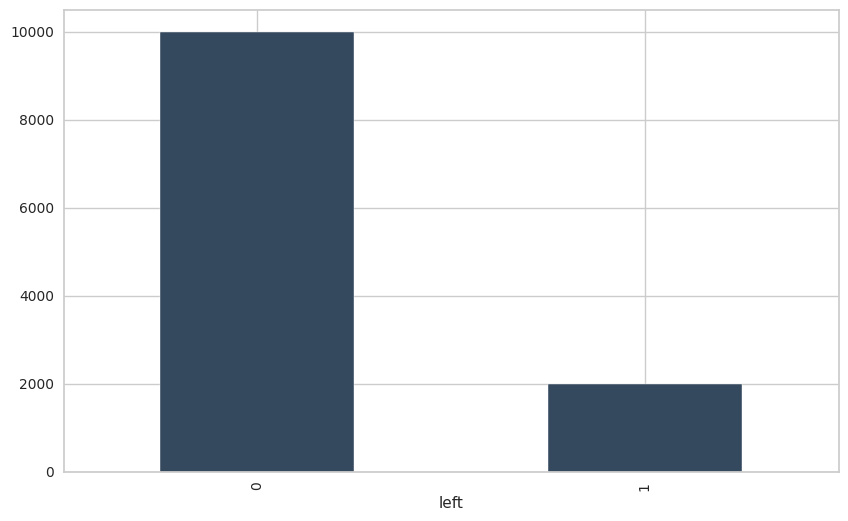

In [15]:
df['left'].value_counts().plot(kind='bar')

In [16]:
# Assuming you have already trained and defined the model
# model = LogisticRegression()

# Assuming df is your dataframe and has been preprocessed as per your requirements
# df = ...

# Assuming label_encoder is defined as the LabelEncoder instance for 'salary' encoding
# label_encoder = LabelEncoder()

# Assuming scaler is defined as the StandardScaler instance for feature scaling
# scaler = StandardScaler()

# Assuming X_train, y_train, X_test, y_test are defined

# Fit the label encoder on all possible categories of the 'salary' column
unique_salaries = df['salary'].unique()
label_encoder_salary = LabelEncoder()
label_encoder_salary.fit(unique_salaries)

# Make predictions for a random employee
random_employee_details = {
    'satisfaction_level': 0.1,
    'last_evaluation': 0.77,
    'number_project': 4,
    'average_montly_hours': 247,
    'time_spend_company': 98,
    'Work_accident': 5,
    'promotion_last_5years': 0,
    'Departments ': 'sales',  # Assuming this corresponds to the label 'sales' in your dataset
    'salary': 'high'  # Assuming this corresponds to the label 'low' in your dataset
}

# Convert the details to a dataframe
random_employee_df = pd.DataFrame([random_employee_details])

# Ensure 'salary' column contains strings
random_employee_df['salary'] = random_employee_df['salary'].astype(str)

# One-hot encode the 'Departments ' column
random_employee_df = pd.get_dummies(random_employee_df, columns=['Departments '])

# Ensure all columns exist in the random employee data
for column in df.columns:
    if column not in random_employee_df.columns:
        random_employee_df[column] = 0

# Reorder columns to match the order during model training
random_employee_df = random_employee_df[df.columns]

# Encode 'salary' column using one-hot encoding
random_employee_df = pd.get_dummies(random_employee_df, columns=['salary'])

# Ensure the random employee data has all one-hot encoded columns
for column in df.columns:
    if column not in random_employee_df.columns:
        random_employee_df[column] = 0

# Ensure the columns are in the same order as during model training
random_employee_df = random_employee_df[X_train.columns]

# Preprocess the random employee data
random_employee_scaled = scaler.transform(random_employee_df)

# Make prediction for the random employee
prediction = model.predict(random_employee_scaled)

# Interpret the prediction
if prediction[0] == 1:
    print("The random employee is predicted to leave the company.")
else:
    print("The random employee is predicted to stay in the company.")


The random employee is predicted to leave the company.


In [17]:
import pickle

In [18]:
with open('/content/scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [19]:
with open('/content/scaler.pkl','rb') as f:
    scaler_saved = pickle.load(f)